# Receiver function, python interface

So you should already have been through the notebook showing the YAML interface. If not, do that first, as this notebook skips all the build steps required to compile code into something that CoFI can work with.

So off the bat, I am going to be assuming you have compiled code into a shared library and it is wrapped in the right way to interact with CoFI (i.e. `cofi_init` and `cofi_misfit`) are implemented and wrapped/annotated.


In [1]:
# Import and initialize
import numpy as np
import os
import sys
from plotnine import *
import pandas as pd
sys.path.append("../")
import cofi_core
from cofi_core import DumbDescent 
from cofi_core import Model
np.random.seed(60065)

# Step 1: import your code 

If you have built your shared library you just need to make sure it is in the python library path, and then import it.

In [3]:
OBJDIR="../user_testing/"
sys.path.append(OBJDIR)
import rosenbrock

Let's have a quick look at the code, because it is so simple

In [4]:
! cat $OBJDIR/rosenbrock.py


def cofi_init():
    pass

def cofi_misfit(x, y):
    A, B = 1.0, 100.0
    return (A-x)**2 + B*(y-x**2)**2




In [5]:
misfit = rosenbrock.cofi_misfit(10, 10)
misfit

810081.0

Now let's run the simple DumbDescent inverse solver for 10s and see if we can improve things


In [6]:
m=Model(x=10.0, y=10.0)
desc = DumbDescent(model=m, forward=rosenbrock.cofi_misfit, step=0.05, time=10)
res = desc.run()

Take a look at the results returned from the inverter. These will be different for each inverse solver: but here we get the best fitting model, the misfit of that model, how the misfit changed over time during inversion (i.e. during multiple calls to `cofi_misfit()`) and some other information returned from `cofi_misfit()`

In [7]:
print(res.keys())
model, misfit, pred2 = res['model'], res['misfit'], res['cofi_misfit_results_for_best_model_1']
misfit_by_time = res['misfit_by_time']

dict_keys(['model', 'misfit', 'misfit_by_time', 'cofi_misfit_results_for_best_model_1'])


What parameters did we get out? Looks like, like everyone else before us, we managed to get close to the solution for our 2D problem....

In [8]:
model.params

[name: x
 value: 1.0000565653703803,
 name: y
 value: 1.000136361885634]

Lastly let's plot how the misfit changed over time. I'll truncate the first 10000 evaluations though because we started in such a poor starting location.

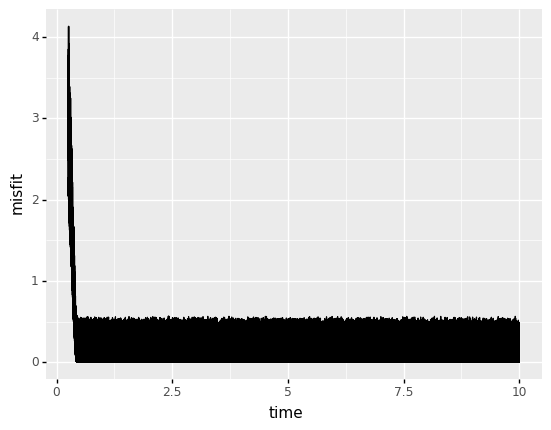

<ggplot: (8790081256223)>

In [9]:
ggplot(pd.DataFrame(misfit_by_time[10000:], columns=["time", "misfit"])) + geom_line(aes(x="time", y="misfit"))